# Predicting the sales price of bulldozers

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1. Problem Statement
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for

## 2. Data

The data has been downloaded from Kaggle Bluebook for Bulldozers competition

## 3. Evaluation
The evaluation metric is the RMSE between the actual and predicted auction prices 

> Note: The goal for most regression evaluation metrics is to minimize the error

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. 


In [1]:
# download data
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2022-09-15 08:13:30--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2022-09-15 08:13:30--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72077822 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip’

bluebook-for-bulldo 100%[===================>]  68.74M   314MB/s    in 0.2s    

2022-09-15 08:13:31 (314

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

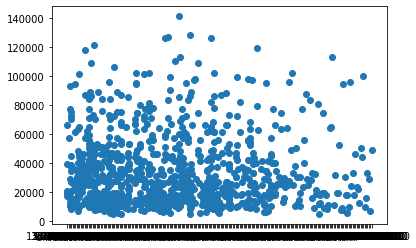

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

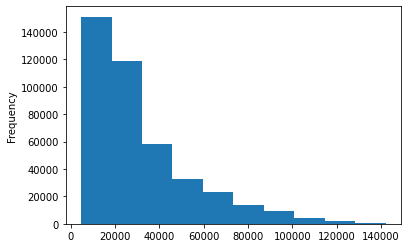

In [7]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter 

In [8]:
# import data again but this time dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

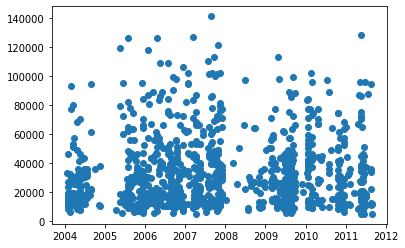

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [14]:
df["saledate"].head(25)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
20   2006-05-18
21   2006-10-19
22   2007-10-25
23   2006-10-19
24   2004-05-20
Name: saledate, dtype: datetime64[ns]

### Sort Datframe by saledate

When working with time series data, it's a good idea to sort it by date 

In [16]:
# Sort Dataframe in date order 
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(25)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
238656   1989-01-31
52508    1989-01-31
127923   1989-01-31
127521   1989-01-31
152689   1989-01-31
Name: saledate, dtype: datetime64[ns]

from sys import orig_argv
### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we have still got our original data

In [19]:
# make a copy
df_temp = df.copy()
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409901,6286556,23000.0,1793587,4605,149,99.0,2006,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405777,6256957,11500.0,1860454,6868,149,99.0,1000,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
411889,6312472,11000.0,1820676,17231,149,99.0,2006,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
411890,6312473,11000.0,1796787,17231,149,99.0,2006,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


### Add a datetime parameters for `saledate` column

In [21]:
df_temp["saleYear"] = df_temp["saledate"].dt.year
df_temp["saleMonth"] = df_temp["saledate"].dt.month
df_temp["saleDay"] = df_temp["saledate"].dt.day
df_temp["saleDayofWeek"] = df_temp["saledate"].dt.dayofweek
df_temp["saleDayofYear"] = df_temp["saledate"].dt.dayofyear

In [22]:
df_temp.T

,205615,233186,142491,115536,92301,115892,134080,92294,31494,140922,...,407382,405913,405915,411423,412544,409901,405777,411889,411890,409203
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,6267915,6257872,6257884,6309986,6327732,6286556,6256957,6312472,6312473,6283635
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,47000.0,13000.0,16500.0,16000.0,11000.0,23000.0,11500.0,11000.0,11000.0,34000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1844076,1837259,1897564,1899882,1906978,1793587,1860454,1820676,1796787,1869284
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,3362,3218,3263,9508,12524,4605,6868,17231,17231,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1977,1995,1996,2005,2006,2006,1000,2006,2006,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [23]:
# now we have enriched our dataframe with date time features, we can remove `saledate`

df_temp.drop("saledate", axis=1, inplace=True)

In [24]:
# check the values of different columns
df_temp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We have done enough EDA (we could always do more) but let us start to do some model-driven EDA

In [29]:
# let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])



ValueError: ignored

In [27]:
# missing values 
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [28]:
df_temp.SalePrice.dtype

dtype('float64')

### Convert string to catgeories
One way we can turn all of our data into numbers us by converting them into pandas catgeories


In [31]:
df_temp.items()

TypeError: ignored

In [33]:
# find the columns which contain strings
for label, content in df_temp.items(): 
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# this will turn all of the string value into category values
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content): 
    df_temp[label] = content.astype("category").cat.as_ordered()

In [35]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [36]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

Thanks to pandas Categories now we have a way to access all of our data in the form of numbers

But we still have a bunch of missing data

In [38]:
df_temp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Save Preprocessed data


In [40]:
# export current temp dataframe 
df_temp.to_csv("train_temp.csv", index=False)

In [41]:
# import preprocessed data
df_temp = pd.read_csv("train_temp.csv", low_memory=False)

df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


## Fill Missing values

### Fill Numeric values

In [45]:
# check which columns are numeric
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [44]:
df.ModelID

205615     8434
233186     9105
142491     4138
115536     3854
92301      7110
          ...  
409901     4605
405777     6868
411889    17231
411890    17231
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [47]:
# check which numeric columns have null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content): 
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [48]:
# fill numeric columns have median values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content): 
    if pd.isnull(content).sum():
      # add a binary column which tells us if the data was missing
      df_temp[label+"_is_missing"] = pd.isnull(content)

      # fill missing values with median
      df_temp[label] = content.fillna(content.median())

In [52]:
# check if there is any null numeric values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content): 
    if pd.isnull(content).sum(): 
      print(label)


In [53]:
# check to see how many examples were missing 
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling and turning categorical variables into numbers


In [54]:
# check for columns which are not numeric
# check which numeric columns have null values
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content): 
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [55]:
# turn categorical variables into numbers and fill missing
# fill numeric columns have median values
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # add a binary column which tells us if the data was missing
    df_temp[label+"_is_missing"] = pd.isnull(content)

    # fill missing values with median
    df_temp[label] = pd.Categorical(content).codes + 1

In [56]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [59]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [60]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model

In [61]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
2,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
3,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
4,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


In [62]:
%%time
# Instantiate model

model = RandomForestRegressor(n_jobs=-1, random_state=42)

# fit the model
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: user 20min 14s, sys: 6.58 s, total: 20min 21s
Wall time: 10min 40s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [63]:
# score the model
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875966080326709

**Question** Why doesn't the above metric hold water? (why isn't the metric reliable)

### Splitting data into train/validation sets


In [64]:
# split data into training and validation 
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [65]:
# split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [66]:
# create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds): 
  """
  Calculates root mean squared log error between predictions and true labels
  """

  return np.sqrt(mean_squared_log_error(y_test, y_preds))


# create function to evaluate model on a few different levels
def show_scores(model): 
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)

  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE" : mean_absolute_error(y_valid, val_preds), 
            "Training RMSLE" : rmsle(y_train, train_preds), 
            "Valid RMSLE" : rmsle(y_valid, val_preds), 
            "Training R^2" : r2_score(y_train, train_preds), 
            "Valid R^2" : r2_score(y_valid, val_preds)}

  return scores


## Testing our model on a subset (to tune the hyperparameters)


In [67]:
# # this takes far too long for experimenting
# model = RandomForestRegressor(n n_jobs = -1, random_state=42)

# model.fit(X_train, y_train)

In [68]:
# change max_sample value
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)



In [69]:
%%time
# cutting down on the max number of samples each estimator can see improves training time

model.fit(X_train, y_train)

CPU times: user 46.2 s, sys: 527 ms, total: 46.7 s
Wall time: 26.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [70]:
show_scores(model)

{'Training MAE': 5548.995840324089,
 'Valid MAE': 7179.6961392897265,
 'Training RMSLE': 0.25737726780537257,
 'Valid RMSLE': 0.29404344200903443,
 'Training R^2': 0.8610738743845616,
 'Valid R^2': 0.8320179198265638}

### Hyperparameter tuning with RandomizedSearchCV

In [71]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators" : np.arange(10, 100, 10), 
           "max_depth" : [None, 3, 5, 10], 
           "min_samples_split" : np.arange(2, 20, 2), 
           "min_samples_leaf" : np.arange(1, 20, 2), 
           "max_features" : [0.5, 1, "sqrt", "auto"], 
           "max_samples" : [10000]}

# instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, 
                              n_iter=2, 
                              cv=5, verbose=True)

# fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 38.4 s, sys: 2.9 s, total: 41.3 s
Wall time: 55.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [72]:
# find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [73]:
# evaluate the randomizedSearch model
show_scores(rs_model)

{'Training MAE': 13329.705105363928,
 'Valid MAE': 15330.251180196665,
 'Training RMSLE': 0.5645587252617599,
 'Valid RMSLE': 0.5714264274880839,
 'Training R^2': 0.3545977548926803,
 'Valid R^2': 0.3408694982509186}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [74]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40, 
                                   min_samples_leaf=1, 
                                   min_samples_split=14, 
                                   max_features=0.5, 
                                   n_jobs=-1, 
                                   max_samples=None)

# fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 3min 50s, sys: 457 ms, total: 3min 50s
Wall time: 2min 12s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [75]:
# scores for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2961.467961434472,
 'Valid MAE': 5975.035587862201,
 'Training RMSLE': 0.14488371261550848,
 'Valid RMSLE': 0.2471797601018422,
 'Training R^2': 0.9586767381397938,
 'Valid R^2': 0.8807903349619348}

### Make predictions on test data

In [77]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [79]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [81]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df


In [82]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [83]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saleDayOfWeek
- saleDayOfYear
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing
- saleDayofWeek
- saleDayofYear

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [84]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing', 'saleDayofWeek', 'saleDayofYear'}

In [87]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [88]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saleDayOfWeek
- saleDayOfYear
Feature names seen at fit time, yet now missing:
- saleDayofWeek
- saleDayofYear

  warnings.warn(message, FutureWarning)


In [89]:
test_preds

array([21994.35976396, 22229.50293446, 47974.95140588, ...,
       17096.87129613, 20280.00207867, 29318.6552012 ])

In [90]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21994.359764
1,1227844,22229.502934
2,1227847,47974.951406
3,1227848,62436.257524
4,1227863,50220.798776
...,...,...
12452,6643171,41650.122839
12453,6643173,13933.354690
12454,6643184,17096.871296
12455,6643186,20280.002079


In [92]:
# Export prediction data
df_preds.to_csv("test_predictions.csv", index=False)

### Feature Importance 

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [93]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.26200574e-02, 2.27433400e-02, 4.49796388e-02, 1.78766415e-03,
       3.40433727e-03, 1.91709644e-01, 3.29178315e-03, 9.72890149e-04,
       4.22903712e-02, 4.16108234e-02, 6.31268582e-02, 4.63189683e-03,
       1.31314639e-02, 1.43008941e-01, 5.04938651e-02, 5.95867977e-03,
       2.77594165e-03, 1.91322950e-03, 2.72774742e-03, 7.91039288e-02,
       5.05247079e-04, 3.45741512e-05, 9.94361475e-04, 1.64858347e-04,
       1.69462603e-03, 2.92665485e-05, 4.12165281e-05, 1.43862111e-02,
       3.62242281e-04, 2.70178718e-04, 3.72357317e-03, 1.40385929e-03,
       3.21666772e-03, 1.42036347e-03, 2.48777314e-03, 8.97587471e-03,
       8.58018330e-04, 1.33633627e-02, 2.29692815e-03, 5.76239664e-04,
       1.60877184e-03, 9.13031760e-04, 2.43589660e-03, 6.31946298e-04,
       5.73999542e-04, 3.66231789e-04, 4.41281046e-04, 2.86243796e-03,
       9.37308066e-04, 3.29797153e-04, 4.40943828e-04, 7.29703582e-02,
       3.79257226e-03, 5.74400563e-03, 2.89300595e-03, 9.98146426e-03,
      

In [94]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

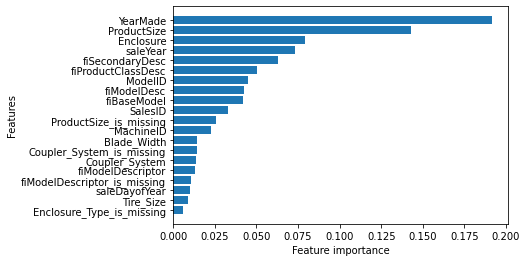

In [95]:
plot_features(X_train.columns, ideal_model.feature_importances_)